# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
pip install citipy

     |████████████████████████████████| 557 kB 3.8 MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=0d5a05e6f8c3041687b25f0c44cd2f090e1ea50743ca229b641f5cc7f97abb9b
  Stored in directory: /Users/carolineambriz/Library/Caches/pip/wheels/6d/df/5e/ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
city_list = []
lat_list= []
lng_list = []
max_temp_list = []
humidity_list = []
cloudy_list = []
wind_speed_list = []
country_list = []
date_list = []
index = 0
counter = 1

In [60]:
print("-------------------------") 
print("Beginning Data Retrieval ")
print("-------------------------") 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_url = f'{url}appid={weather_api_key}&units={units}&q='

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(weather_url + city).json()
        city_list.append(response["name"])
        cloudy_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index > 49:
            index = 0
            counter = counter + 1
        else:
            index = index + 1
            
        print(f"Processing Record {index} of Set {counter} : {city}")
   
    except(KeyError, IndexError):
        print("City not found. Skipping.")
        
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

-------------------------
Beginning Data Retrieval 
-------------------------
Processing Record 2 of Set 1 : hermanus
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : faya
Processing Record 5 of Set 1 : margate
Processing Record 6 of Set 1 : mar del plata
Processing Record 7 of Set 1 : barrow
Processing Record 8 of Set 1 : lahuachaca
Processing Record 9 of Set 1 : atuona
Processing Record 10 of Set 1 : new norfolk
Processing Record 11 of Set 1 : saint-joseph
Processing Record 12 of Set 1 : kaitangata
Processing Record 13 of Set 1 : domoni
Processing Record 14 of Set 1 : ushuaia
City not found. Skipping.
Processing Record 16 of Set 1 : coquimbo
Processing Record 17 of Set 1 : port hawkesbury
Processing Record 18 of Set 1 : lata
Processing Record 19 of Set 1 : meulaboh
Processing Record 20 of Set 1 : kapaa
Processing Record 21 of Set 1 : fortuna
City not found. Skipping.
Processing Record 23 of Set 1 : talnakh
Processing Record 24 of Set 1 : hobart
Processing Record 

Processing Record 0 of Set 143 : lorengau
Processing Record 0 of Set 144 : ketchikan
Processing Record 0 of Set 145 : tuatapere
Processing Record 0 of Set 146 : naze
Processing Record 0 of Set 147 : muros
City not found. Skipping.
Processing Record 0 of Set 148 : krasnoselkup
Processing Record 0 of Set 149 : fushun
Processing Record 0 of Set 150 : hohhot
Processing Record 0 of Set 151 : maksatikha
City not found. Skipping.
Processing Record 0 of Set 152 : vangaindrano
Processing Record 0 of Set 153 : jutai
Processing Record 0 of Set 154 : rocha
Processing Record 0 of Set 155 : baykit
Processing Record 0 of Set 156 : golden
Processing Record 0 of Set 157 : thai binh
Processing Record 0 of Set 158 : olinda
Processing Record 0 of Set 159 : tromso
Processing Record 0 of Set 160 : nanortalik
Processing Record 0 of Set 161 : utete
Processing Record 0 of Set 162 : tabuk
Processing Record 0 of Set 163 : andijon
Processing Record 0 of Set 164 : nouakchott
City not found. Skipping.
Processing Re

Processing Record 0 of Set 322 : anadyr
City not found. Skipping.
Processing Record 0 of Set 323 : nalut
City not found. Skipping.
Processing Record 0 of Set 324 : bathsheba
Processing Record 0 of Set 325 : gourcy
Processing Record 0 of Set 326 : leua
Processing Record 0 of Set 327 : maniitsoq
Processing Record 0 of Set 328 : dwarka
Processing Record 0 of Set 329 : mumford
Processing Record 0 of Set 330 : orotukan
Processing Record 0 of Set 331 : znamenskoye
Processing Record 0 of Set 332 : mnogovershinnyy
Processing Record 0 of Set 333 : tapejara
Processing Record 0 of Set 334 : juneau
Processing Record 0 of Set 335 : krasnozerskoye
Processing Record 0 of Set 336 : sola
Processing Record 0 of Set 337 : luau
Processing Record 0 of Set 338 : labuhan
Processing Record 0 of Set 339 : bardoli
Processing Record 0 of Set 340 : sena madureira
Processing Record 0 of Set 341 : valparaiso
Processing Record 0 of Set 342 : jardim
Processing Record 0 of Set 343 : progreso
Processing Record 0 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
weather_data = pd.DataFrame({"City": city_list,
                            "Lat": lat_list,
                            "Lng": lng_list,
                            "Max Temp": max_temp_list,
                            "Humidity": humidity_list,
                            "Wind Speed": wind_speed_list,
                            "Cloudiness":cloudy_list,
                            "Country": country_list,
                            "Date": date_list
                            })
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Hermanus,-34.4187,19.2345,62.01,86,1.01,67,ZA,1619482993
1,Rikitea,-23.1203,-134.9692,78.06,72,7.99,72,PF,1619483042
2,Faya,18.3851,42.4509,59.00,82,3.29,0,SA,1619483043
3,Margate,51.3813,1.3862,44.01,81,1.01,100,GB,1619482967
4,Mar del Plata,-38.0023,-57.5575,54.00,93,4.09,1,AR,1619482915


In [62]:
weather_data.to_csv('../output_data/weather_data.csv')
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness,Country,Date
0,Hermanus,-34.4187,19.2345,62.01,86,1.01,67,ZA,1619482993
1,Rikitea,-23.1203,-134.9692,78.06,72,7.99,72,PF,1619483042
2,Faya,18.3851,42.4509,59.00,82,3.29,0,SA,1619483043
3,Margate,51.3813,1.3862,44.01,81,1.01,100,GB,1619482967
4,Mar del Plata,-38.0023,-57.5575,54.00,93,4.09,1,AR,1619482915


In [63]:
weather_data['Humidity'].max()

100

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

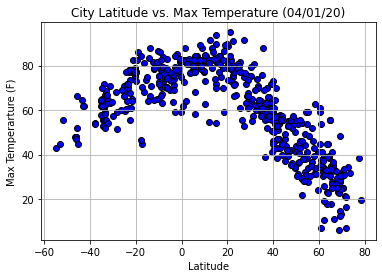

In [69]:
x = weather_data["Lat"]
y = weather_data["Max Temp"]

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperarture (F)")
plt.grid(True) 

plt.show()

## Latitude vs. Humidity Plot

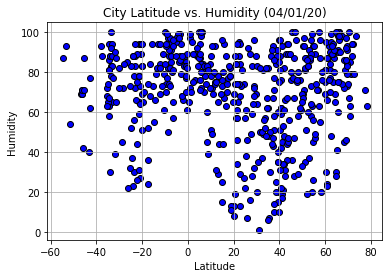

In [70]:
x = weather_data["Lat"]
y = weather_data["Humidity"]

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True) 

plt.show()

## Latitude vs. Cloudiness Plot

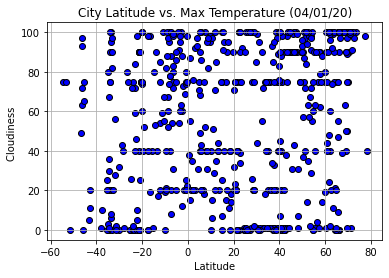

In [71]:
x = weather_data["Lat"]
y = weather_data["Cloudiness"]

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness ")
plt.grid(True) 

plt.show()

## Latitude vs. Wind Speed Plot

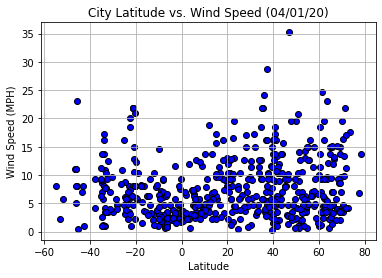

In [72]:
x = weather_data["Lat"]
y = weather_data["Wind Speed"]

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 

plt.show()

## Linear Regression

In [76]:
northern = weather_data.loc[weather_data["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather_data.loc[weather_data["Lat"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.7853416655859669


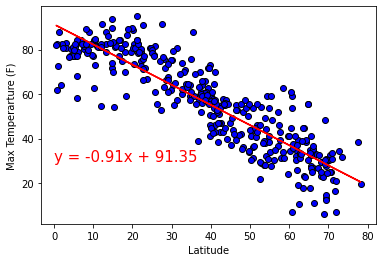

In [102]:
x = northern["Lat"]
y = northern["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temperarture (F)")


plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.49215332218255475


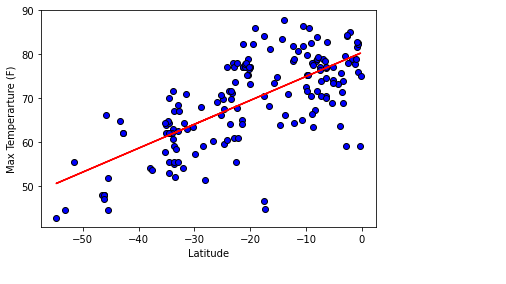

In [107]:
x = southern["Lat"]
y = southern["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temperarture (F)")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.010064424151266118


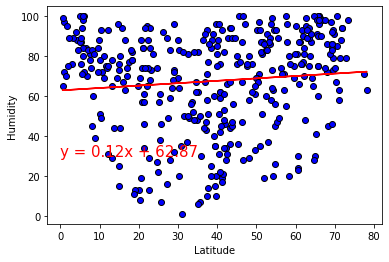

In [100]:
x = northern["Lat"]
y = northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")


plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.05188706180573311


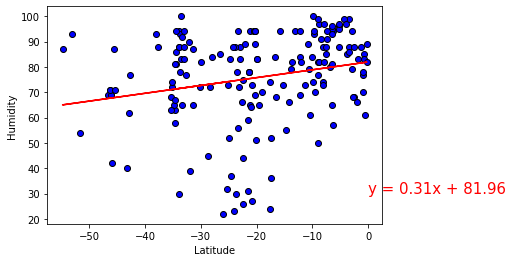

In [99]:
x = southern["Lat"]
y = southern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.030595033703533923


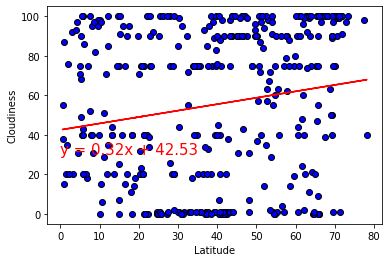

In [98]:
x = northern["Lat"]
y = northern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.49215332218255475


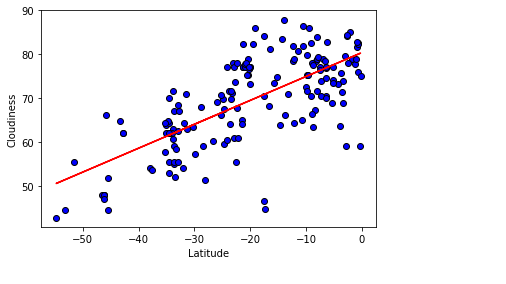

In [103]:
x = southern["Lat"]
y = southern["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.013799128782348692


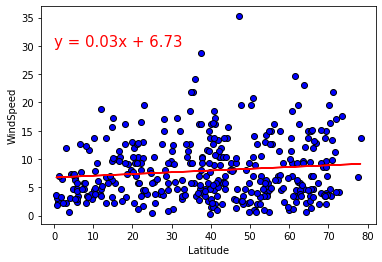

In [104]:
x = northern["Lat"]
y = northern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")


plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.07994601181183687


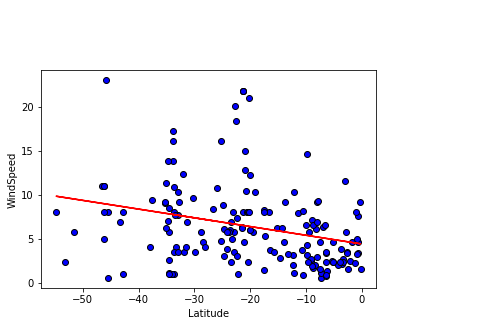

In [106]:
x = southern["Lat"]
y = southern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

print(f"the r-value is: {rvalue**2}")

plt.scatter(x, y, marker = 'o', color = 'b', edgecolor = "black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 30), color='red', fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")

plt.show()